# Section 1: Introduction to Word Embeddings

Word embeddings are a powerful concept in natural language processing (NLP) that involve representing words as dense vectors in a continuous vector space. Unlike traditional representations of words as one-hot encoded vectors, where each word is represented as a sparse vector with a single '1' corresponding to the word's index in the vocabulary and '0's everywhere else, word embeddings capture semantic information about words. This means that words with similar meanings are represented by vectors that are close to each other in the vector space.

## Why Use Word Embeddings?

- Dimensionality Reduction: Word embeddings reduce the dimensionality of the word representation compared to one-hot encoding, making computations more efficient.

- Semantic Similarity: Word embeddings capture semantic relationships between words, so words with similar meanings have similar vector representations. This is a significant advantage over one-hot encoding, where every word is equally distant from every other word.

- Contextual Information: In more advanced models like Word2Vec or GloVe, the embeddings are learned based on the context in which words appear, capturing not just the meaning of the words but also how they are used in sentences.

## How Word Embeddings Capture Semantic Relationships

Word embeddings are typically learned using neural network models that process large text corpora. The basic idea is that words appearing in similar contexts are likely to have similar meanings. For example, in the sentences "The cat is climbing the tree" and "The dog is climbing the ladder," the words "cat" and "dog" appear in similar contexts and are both animals, so their embeddings will be closer in the vector space.

Models like Word2Vec use this principle to learn embeddings by predicting a word based on its context (Continuous Bag of Words approach) or predicting the context based on a word (Skip-gram approach). As a result, the learned embeddings capture various semantic relationships, such as synonyms, antonyms, and more abstract associations.

## Visualization of Word Embeddings

One way to understand how word embeddings capture semantic relationships is through visualization. By using dimensionality reduction techniques like t-SNE (t-distributed Stochastic Neighbor Embedding) or PCA (Principal Component Analysis), we can project the high-dimensional word vectors onto a 2D or 3D space and visualize how similar words cluster together.

In summary, word embeddings are a fundamental concept in NLP that enable machines to understand the semantic relationships between words. By representing words as vectors in a continuous space, embeddings provide a more nuanced and efficient way to process natural language.

In [1]:
!pip install matplotlib
!pip install -U scikit-learn
!pip install nltk
!pip install gensim

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/52/2d/ad6928a578c78bb0e44e34a5a922818b14c56716b81d145924f1f291416f/scikit_learn-1.3.2-cp38-cp38-win_amd64.whl.metadata
  Using cached scikit_learn-1.3.2-cp38-cp38-win_amd64.whl.metadata (11 kB)
Using cached scikit_learn-1.3.2-cp38-cp38-win_amd64.whl (9.3 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.0
    Uninstalling scikit-learn-1.3.0:
      Successfully uninstalled scikit-learn-1.3.0
  Rolling back uninstall of scikit-learn
  Moving to c:\users\lunam\anaconda3\lib\site-packages\scikit_learn-1.3.0.dist-info\
   from C:\Users\lunam\Anaconda3\Lib\site-packages\~cikit_learn-1.3.0.dist-info
  Moving to c:\users\lunam\anaconda3\lib\site-packages\sklearn\__check_build\__init__.py
   from C:\Users\lunam\AppData\Local\Temp\pip-uninstall-a0lgljh7\__init__.py
  Moving to c:\users\lunam\anaconda3\lib\site-packages\sklearn\__check_build\__pycache__\
   fro

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\lunam\\Anaconda3\\Lib\\site-packages\\sklearn\\.libs\\msvcp140.dll'
Consider using the `--user` option or check the permissions.



# Section 2 : Downloading and Preprocessing a Dataset

We will use the fetch_20newsgroups dataset from scikit-learn, which contains a collection of about 20,000 newsgroup documents across 20 different newsgroups. The goal is to preprocess the text data and convert it into a format suitable for training word embeddings.

The code below helps you download the dataset. You'll have to do some of the simple preprocessing steps yourself.

In [2]:
from sklearn.datasets import fetch_20newsgroups

# Load the dataset
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
documents = newsgroups.data
documents[0]

"\n\nI am sure some bashers of Pens fans are pretty confused about the lack\nof any kind of posts about the recent Pens massacre of the Devils. Actually,\nI am  bit puzzled too and a bit relieved. However, I am going to put an end\nto non-PIttsburghers' relief with a bit of praise for the Pens. Man, they\nare killing those Devils worse than I thought. Jagr just showed you why\nhe is much better than his regular season stats. He is also a lot\nfo fun to watch in the playoffs. Bowman should let JAgr have a lot of\nfun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final\nregular season game.          PENS RULE!!!\n\n"

Let's start by preprocessing the dataset. In the given preprocess function, we will:
- remove punctuation and special characters (anything other than letters and numbers)
- convert text to lowercase
- remove extra spaces
- remove digits
- lemmanize the text
- remove stopwords

The last 2 steps have been done for you in the line before the return statement. Use regex (or any other method) to perform the first 4 steps.

The preprocess function should take a single string as input and return a preprocessed string. Apply the preprocess function to each document and store all the preprocessed documents in the 'preprocessed_documents' list. Remember that a 'document' is a single string from the dataset in this context.

In [3]:
#Split so it does not need to download every time I test preprocess
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download NLTK stopwords and WordNet data
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

# Set of stopwords
stop_words = set(stopwords.words('english'))

# Initialize the WordNet lemmatizer
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lunam\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lunam\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lunam\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
def preprocess(text : str) -> str:
    # Lowercase the text
    text = text.lower() #Lowercase the text
    
    # Remove punctuation, digits, and special characters
    text = re.sub("\n", " ", text) #Remove \n and turn it into a space, as the newline character acts as a space in some of the text
    text = re.sub(r"[^a-z]", " ", text) #Remove anything that is not a lowercase letter, thus handling numbers and special characters without having to list them
    
    #The given lemmatize function already handles removing extra spaces

    # Tokenize and remove stopwords, then lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words]
    return ' '.join(tokens)

# Preprocess all documents
preprocessed_documents = [preprocess(doc) for doc in documents] #Send the sentences to the preprocessor

print(f'Number of preprocessed documents: {len(preprocessed_documents)}')


Number of preprocessed documents: 18846


In [5]:
print(preprocessed_documents[0])

sure bashers pen fan pretty confused lack kind post recent pen massacre devil actually bit puzzled bit relieved however going put end non pittsburghers relief bit praise pen man killing devil worse thought jagr showed much better regular season stats also lot fo fun watch playoff bowman let jagr lot fun next couple game since pen going beat pulp jersey anyway disappointed see islander lose final regular season game pen rule


In [6]:
# TEST CASES - DO NOT MODIFY
assert preprocess("Hello") == "hello"
assert preprocess("Hello!") == "hello"
assert preprocess("  Hello 123  ") == "hello"
assert preprocess("  Hello 123  World!") == "hello world"

# Section 3: Training Word Embeddings - The Word2Vec Model

In this section, we will train word embeddings using the Word2Vec model. Word2Vec is a popular model for learning word embeddings from a text corpus. It comes in two flavors: the Continuous Bag of Words (CBOW) model and the Skip-gram model. In this notebook, we will use the Skip-gram model as it is easier to implement and has been shown to produce better word embeddings.

The Word2Vec model is trained by predicting the context words (or surrounding words) given a target word. The model learns to map words that are found in similar contexts to nearby points in the vector space. This allows the model to capture semantic relationships between words.

Let's start by training a Word2Vec model using the preprocessed dataset. We will use the Gensim library to train the Word2Vec model. The code below shows how to train a Word2Vec model using the preprocessed dataset.

The official TensorFlow documentation and guide is a great resource to learn more about Word2Vec and how to train your own Word2Vec model.
https://www.tensorflow.org/text/tutorials/word2vec
The Python code to train your own model is also available in the guide.

The training objective of the Word2Vec model is to maximize the probability of predicting the context words given a target word. This is done by minimizing the negative log likelihood of the observed context words given the target word. The model is trained using stochastic gradient descent and backpropagation.

The basic skip gram formulation defines the probability using the softmax function: $P(w_O|w_I) = \frac{exp(v'_{w_O} \cdot v_{w_I})}{\sum_{w=1}^{W} exp(v'_{w} \cdot v_{w_I})}$

Where:
- $w_I$ is the input word
- $w_O$ is the output word
- $v_{w_I}$ is the input word vector
- $v'_{w_O}$ is the output word vector
- W is the number of words in the vocabulary

The softmax function computes the probability of the output word given the input word and all the words in the vocabulary. However, computing the softmax over the entire vocabulary is computationally expensive, especially for large vocabularies. To address this issue, the Word2Vec model uses a technique called negative sampling, which approximates the softmax function with a simpler objective.

Gensim is a popular Python library for topic modeling, document indexing, and similarity retrieval with large corpora. It is used to train Word2Vec models and provides an easy-to-use interface for working with word embeddings. You can read more about Gensim and its Word2Vec implementation in the official documentation here: https://radimrehurek.com/gensim/models/word2vec.html

In [7]:
# Train a Word2Vec model
from gensim.models import Word2Vec, callbacks

# STANDARD CALLBACK TO PRINT LOSS - DO NOT MODIFY
class callback(callbacks.CallbackAny2Vec):
    def __init__(self):
        self.epoch = 0

    def on_epoch_end(self, model):
        loss = model.get_latest_training_loss()
        if self.epoch == 0:
            print('Loss after epoch {}: {}'.format(self.epoch, loss))
        else:
            print('Loss after epoch {}: {}'.format(self.epoch, loss - self.loss_previous_step))
        self.epoch += 1
        self.loss_previous_step = loss

Start by training a Word2Vec model using the preprocessed dataset. The code below shows how to train a Word2Vec model using the Gensim library. The model is trained on the preprocessed dataset, and the resulting word embeddings are stored in the w2v_model variable.

Experiment with different hyperparameters such as vector_size, window, min_count, and epochs to see how they affect the quality of the word embeddings. You can also try using the CBOW model instead of the Skip-gram model. Read the Gensim documentation for more details on the available hyperparameters and their effects.

This block of code will take a while to run. The time taken will depend on the size of the dataset and the hyperparameters chosen. You can experiment with a smaller subset of the dataset to speed up the process. You can also consider using Google Colab or other cloud-based platforms for faster computation.

In [8]:
from nltk.tokenize import word_tokenize

# Tokenize the preprocessed documents
tokenized_documents = [word_tokenize(doc) for doc in preprocessed_documents]
print(tokenized_documents[0])

['sure', 'bashers', 'pen', 'fan', 'pretty', 'confused', 'lack', 'kind', 'post', 'recent', 'pen', 'massacre', 'devil', 'actually', 'bit', 'puzzled', 'bit', 'relieved', 'however', 'going', 'put', 'end', 'non', 'pittsburghers', 'relief', 'bit', 'praise', 'pen', 'man', 'killing', 'devil', 'worse', 'thought', 'jagr', 'showed', 'much', 'better', 'regular', 'season', 'stats', 'also', 'lot', 'fo', 'fun', 'watch', 'playoff', 'bowman', 'let', 'jagr', 'lot', 'fun', 'next', 'couple', 'game', 'since', 'pen', 'going', 'beat', 'pulp', 'jersey', 'anyway', 'disappointed', 'see', 'islander', 'lose', 'final', 'regular', 'season', 'game', 'pen', 'rule']


---

## An aside: The different hyperparameters

feature size: 300 simply proved to be best. 400 provided much slower speeds for very little gain, while 200 provided similar speeds for a much worse loss.

window context: This parameter is very similar to feature size, just with 5 being the better size, 7 being slower and not much better in terms of loss, and 3 being much worse at similar speeds.

min word count: This one seemed to make loss worse at any value except zero. The documentation says this parameter drops words off. It then makes sense why the model would preform worse, since it is missing information.

epochs: 10 appeared to be the best number in this case. The speed with these other parameters is pretty fast, so that was not the main concern. 10 ended up being chosen because 1, 2, and 5 had adjustments in loss still occurring while 20 had far exceeded the point of any change. 10 appeared to be more in that sweet spot.

Sample was the interesting parameter, which is why this aside has been set up. With a sample of 0, loss starts at over 1 million, as shown below. Any changes in the above hyperparameters kept it still in that range, with the lowest attained in the 3-epoch test series being used at the time being just below that number at 9900000. The below run brought it to around 700,000 after 10 epochs (showing how 10 is a good number for these runs), but that is still very high compared to runs with sample not being 0.

In [9]:
# Experiment with different hyperparameters. Note: too many epochs can take a long time to train
feature_size = 300    # Word vector dimensionality
window_context = 5          # Context window size
min_word_count = 0   # Minimum word count
sample = 0   # Downsample setting for frequent words
epochs = 10     # Number of epochs

# Initialize the model
word2vec_model = Word2Vec(tokenized_documents, vector_size = feature_size, window = window_context, 
                          min_count = min_word_count, sample = sample, epochs = epochs)

# Build the vocabulary
word2vec_model.build_vocab(tokenized_documents)

# Train the model and show the progress using the callback
word2vec_model.train(tokenized_documents, total_examples = len(tokenized_documents), epochs = epochs, compute_loss = True, callbacks = [callback()])

Loss after epoch 0: 1634787.5
Loss after epoch 1: 1351077.0
Loss after epoch 2: 1173167.75
Loss after epoch 3: 987946.75
Loss after epoch 4: 957350.5
Loss after epoch 5: 909157.0
Loss after epoch 6: 865801.5
Loss after epoch 7: 809581.0
Loss after epoch 8: 713219.0
Loss after epoch 9: 701062.0


(20048100, 20593250)

This is where sample came in, as for every 0 added to 0.00001, the lost would be brought down fast. This is displayed in the actual used parameters below, where loss becomes almost 0. The 0 loss might not mean as much in this context, but dropping from millions to near 0 that fast makes it clear why this was the parameter to note.

---

In [10]:
# Experiment with different hyperparameters. Note: too many epochs can take a long time to train
feature_size = 300    # Word vector dimensionality
window_context = 5          # Context window size
min_word_count = 0   # Minimum word count
sample = 0.00000000000000001   # Downsample setting for frequent words
epochs = 10     # Number of epochs

# Initialize the model
word2vec_model = Word2Vec(tokenized_documents, vector_size = feature_size, window = window_context, 
                          min_count = min_word_count, sample = sample, epochs = epochs)

# Build the vocabulary
word2vec_model.build_vocab(tokenized_documents)

# Train the model and show the progress using the callback
word2vec_model.train(tokenized_documents, total_examples = len(tokenized_documents), epochs = epochs, compute_loss = True, callbacks = [callback()])

Loss after epoch 0: 4.231315612792969
Loss after epoch 1: 0.0
Loss after epoch 2: 0.0
Loss after epoch 3: 4.231315612792969
Loss after epoch 4: 4.231315612792969
Loss after epoch 5: 0.0
Loss after epoch 6: 0.0
Loss after epoch 7: 12.693946838378906
Loss after epoch 8: 4.231315612792969
Loss after epoch 9: 0.0


(9, 20593250)

In [11]:
# Save the model, separated so that it is not taking the memory on my computer to save every time
word2vec_model.save('word2vec_model.bin')

We're going to load the saved model, find the most similar words to a given word, and visualize the word embeddings using PCA.

First, start by loading the model, then input a word of your choice and find the most similar words to it (read the documentation to figure out how). You can test your function using the test cases provided.

In [12]:
def find_similar_words(model_path:str, word:str, topn=5):
    # Load the model
    word2vec_model = Word2Vec.load(model_path)
    # Get the most similar words
    similar_words = word2vec_model.wv.most_similar(word, topn = topn)
    return similar_words

# Get the word vector for given word
word = "party"
vector = word2vec_model.wv[word]
print(f'Word vector for {word}: {vector}')

# Get the most similar words
similar_words = find_similar_words('word2vec_model.bin', word)
print(f'Most similar words to {word}: {similar_words}')

Word vector for party: [-3.8645466e-04  4.3211380e-04 -2.0840743e-03  1.4173810e-03
 -2.0400556e-03  1.8096439e-03  1.2810930e-03 -1.4262311e-03
 -9.1048121e-04 -1.6558449e-03  3.1116300e-03  5.8198773e-04
  1.6522045e-03 -2.0831716e-03 -2.1731278e-03  2.7906469e-03
 -2.0923372e-03 -1.3746771e-03 -3.2021059e-03 -3.2434470e-03
 -1.5588804e-03  2.7934969e-03 -1.0654673e-03 -1.9284089e-05
 -2.0972458e-03 -9.1535924e-04  2.5528669e-03 -3.2090585e-04
 -2.8435906e-04  8.7634526e-04 -1.3194040e-03  3.0907611e-03
 -3.1577202e-03 -1.1999699e-03  1.9911448e-03 -3.5007516e-04
 -2.8460864e-03  3.0024671e-03 -1.0175792e-03 -1.6148197e-03
 -3.0935844e-03 -1.9405325e-03 -9.3159280e-05 -2.0734011e-03
  2.6794751e-03  2.5589257e-03  3.6853511e-04  1.7704880e-03
 -2.9393372e-03  2.1184576e-03 -4.4942182e-04  3.1569977e-03
  2.8919260e-04 -1.9238273e-03 -1.5567851e-03  2.4042462e-03
 -1.7568946e-04 -8.0267193e-05 -1.4468523e-03  2.5669055e-03
  2.9209873e-03  1.5798851e-03  1.6852499e-03 -1.0609467e-03
 

In [13]:
# TESTS - DO NOT MODIFY
assert vector.shape == (feature_size,)
assert type(similar_words[0]) == tuple
assert len(similar_words[0]) == 2
assert type(similar_words[0][0]) == str

We will then visualize the word embeddings using PCA. PCA is a dimensionality reduction technique that projects high-dimensional data onto a lower-dimensional space while preserving the structure of the data as much as possible. By applying PCA to the word embeddings, we can visualize the words in a 2D or 3D space and observe how similar words cluster together.

The code below plots the word embeddings in a 3D space. You can modify the code to plot the word embeddings in a 2D space if you prefer. Experiment with different words and observe how they cluster together in the vector space. Do words with similar meanings appear close to each other? How do the clusters change with different words?

Code has been changed to display in 2D since that is easier on my brain.

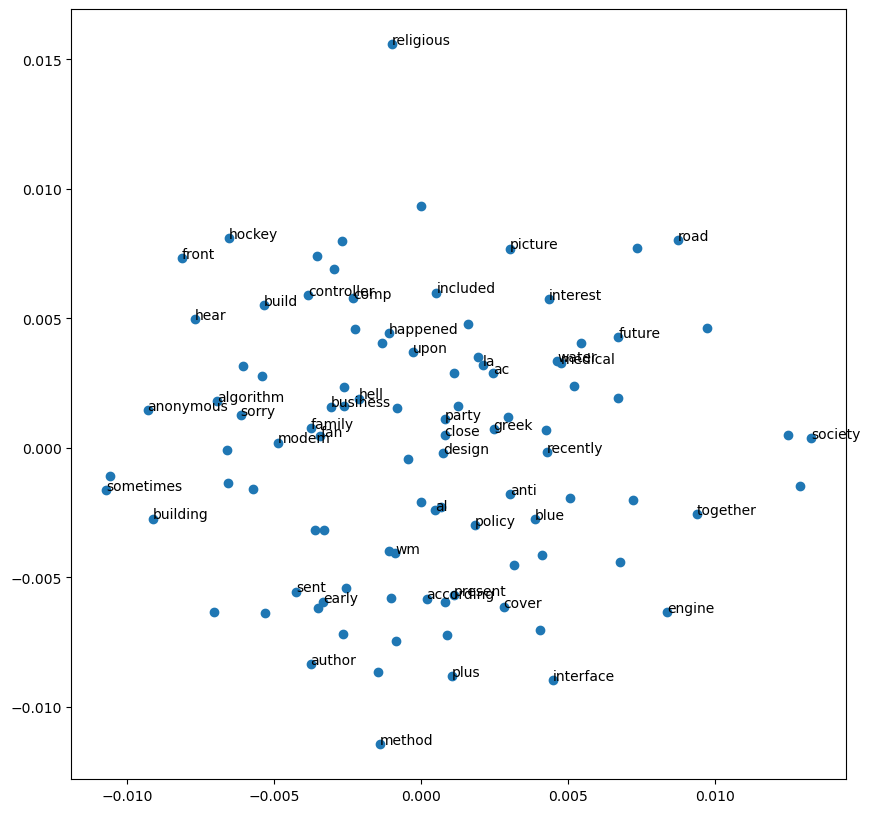

In [14]:
# Plot word vectors using PCA
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

# Get the word vectors
X = word2vec_model.wv[word2vec_model.wv.key_to_index]

# Reduce the dimensions of the word vectors
pca = PCA(n_components=2)
result = pca.fit_transform(X[400:500])

# Create a 3D scatter plot of the projection
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)#, projection='2d')
ax.scatter(result[:, 0], result[:, 1])#, result[:, 2])
words = list(word2vec_model.wv.index_to_key)
for i, word in enumerate(words[600:650]):
    ax.text(result[i, 0], result[i, 1], word)#, result[i, 2], word)
plt.show()

# Section 4: Using the Word Embeddings for Text Classification

In the previous assignment, we saw how we could use TF-IDF to convert text data into a format suitable for training machine learning models. In this section, we will use the word embeddings for the same purpose. Unlike TF-IDF, word embeddings capture semantic information about words, so they can potentially improve the performance of text classification models.

We will use the word embeddings trained in the previous section to convert the text data into numerical vectors. Then, we will train a simple text classification model using the vectorized text data.

In [15]:
# Load the IMDB sentiment analysis dataset
import os
import tarfile
import urllib.request
import pandas as pd

# Download the dataset
url = 'https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz'
file_path = 'aclImdb_v1.tar.gz'
if not os.path.exists(file_path):
    urllib.request.urlretrieve(url, file_path)

# Extract the dataset
with tarfile.open(file_path, 'r:gz') as tar:
    tar.extractall()

# Load the dataset
def load_imdb_dataset(split):
    reviews = []
    for sentiment in ['pos', 'neg']:
        folder = f'aclImdb/{split}/{sentiment}'
        for filename in os.listdir(folder):
            with open(os.path.join(folder, filename), 'r', encoding='utf-8') as file:
                review = file.read()
                reviews.append({'review': review, 'sentiment': sentiment})
    return pd.DataFrame(reviews)

Let's do some standard splitting of the data into train, validation and test sets.

In [16]:
# Load the training dataset
train_df = load_imdb_dataset('train')

# Load the test dataset
test_df = load_imdb_dataset("test")

In [17]:
# Shuffle the dataset
shuffled_data = train_df.sample(frac = 1)

# Split the train dataset into train and validation; This creates an 80:20 split
length_train = int(len(shuffled_data)/10)*8
train_df = shuffled_data[:length_train]
val_df = shuffled_data[length_train+1:]

print(f"Length of the training set: {len(train_df)}")
print(f"Length of the validation set: {len(val_df)}")

# Display the first few rows of the training dataset
train_df.head()

Length of the training set: 20000
Length of the validation set: 4999


,review,sentiment
21612,The most horrible retelling of a great series....,neg
10250,"Basically, the movie might be one of the most ...",pos
5175,I give this movie an A+ for the sheer camp of ...,pos
3259,Say what you want about Andy Milligan - but if...,pos
3223,I watched the presentation of this on PBS in t...,pos


The word2vec_vectorize function below is used to convert the text data into numerical vectors using the trained word embeddings. The function will take a string and the trained Word2Vec model as input and return a numpy array representing the vectorized text data.

If you run into data or memory issues, you can use the first 1000 documents from the dataset to train the word embeddings and for the text classification task. This will reduce the performance of the model, but it will allow you to experiment with the code and understand the concepts.

In [18]:
# Use the Word2Vec model to convert the reviews to vectors
def word2vec_vectorize(text, model):
    # Preprocess the text
    preprocessed_text = preprocess(text)
    # Tokenize the text
    tokens = word_tokenize(preprocessed_text)
    # Initialize the vector
    vector = np.zeros(model.vector_size)
    # Initialize the count
    count = 0
    # Iterate over the tokens
    for token in tokens:
        # Check if the token is in the model's vocabulary
        try:
            if token in model.wv:
                # Add the token's vector to the result
                vector += model.wv[token]
                # Increment the count
                count += 1
        except:
            print(f'Error with token: {token}')
    # Return the result
    return vector / count if count > 0 else vector

# Vectorize the reviews
train_df['vector'] = train_df['review'].apply(lambda x: word2vec_vectorize(x, word2vec_model))
val_df['vector'] = val_df['review'].apply(lambda x: word2vec_vectorize(x, word2vec_model))
test_df['vector'] = test_df['review'].apply(lambda x: word2vec_vectorize(x, word2vec_model))

C:\Users\lunam\AppData\Local\Temp\ipykernel_16172\3810539620.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['vector'] = train_df['review'].apply(lambda x: word2vec_vectorize(x, word2vec_model))
C:\Users\lunam\AppData\Local\Temp\ipykernel_16172\3810539620.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_df['vector'] = val_df['review'].apply(lambda x: word2vec_vectorize(x, word2vec_model))


In [19]:
# Display the first few rows of the training dataset
train_df.head()

,review,sentiment,vector
21612,The most horrible retelling of a great series....,neg,"[-5.671295440296872e-05, 0.0002552600066258532..."
10250,"Basically, the movie might be one of the most ...",pos,"[-0.00016762821735257289, -0.00012997789829551..."
5175,I give this movie an A+ for the sheer camp of ...,pos,"[0.0003945421876688661, 0.00030444502807867055..."
3259,Say what you want about Andy Milligan - but if...,pos,"[5.389757435685689e-05, 0.00037671286344762153..."
3223,I watched the presentation of this on PBS in t...,pos,"[0.0005410600543141102, -2.1194461281255286e-0..."


We will now take you through the process of using PyTorch to train a simple text classification model. We will use the vectorized text data to train the model and evaluate its performance on a test set.

Training a model with PyTorch involves the following steps:
- Stack the vectorized text data and labels into a TensorDataset.
- Encode the target variable (labels) using LabelEncoder. This is necessary because PyTorch models require the target variable to be encoded as integers. In this case, we have two classes, so the labels will be encoded as 0 and 1. You can use the LabelEncoder from scikit-learn (link: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) to perform this encoding or write a custom function to do it.
- Create a DataLoader to load the data in batches.

Hint: You can use np.stack() to stack the vectorized text data and labels into a single numpy array, then use TensorDataset to create a dataset. You can then use DataLoader to create a DataLoader. You can use the following code as a reference:

```python
from torch.utils.data import TensorDataset, DataLoader

# Stack the vectorized text data and labels into a single numpy array
X = np.stack(vectorized_text_data)
y = np.array(labels)

# Create a TensorDataset
dataset = TensorDataset(torch.from_numpy(X), torch.from_numpy(y))

# Create a DataLoader
batch_size = 32
dataloader = DataLoader(dataset, batch_size=batch_size)
```

You will have to use this example code to create a DataLoader for the train, validation, and test sets.

In [20]:
# Use the vectorized reviews to train a classifier in PyTorch - this will be a simple classifier with a single hidden layer
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import TensorDataset, DataLoader

# Convert the vectorized reviews to numpy arrays
X_train = np.stack(train_df["vector"])
X_val = np.stack(val_df["vector"])
X_test = np.stack(test_df["vector"])

# Encode the target variable
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_df["sentiment"])
y_val = label_encoder.fit_transform(val_df["sentiment"])
y_test = label_encoder.fit_transform(test_df["sentiment"])


# Define the dataset class
dataset_train = TensorDataset(torch.from_numpy(X_train), torch.from_numpy(y_train))
dataset_val = TensorDataset(torch.from_numpy(X_val), torch.from_numpy(y_val))
dataset_test = TensorDataset(torch.from_numpy(X_test), torch.from_numpy(y_test))

# Define the dataloader
batch_size = 32

dataloader_train = DataLoader(dataset_train, batch_size)
dataloader_val = DataLoader(dataset_val, batch_size)
dataloader_test = DataLoader(dataset_test, batch_size)

The final step is to define the neural network model. You are free to define your own model architecture (at least 2 hidden layers).

```python
class TextClassifier(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(TextClassifier, self).__init__()
            <DEFINE YOUR LAYERS HERE>

    def forward(self, x):
        <DEFINE THE FEEDFORWARD COMPUTATION HERE>
```

This is a simple feedforward neural network with one hidden layer. The input dimension (input_dim) should be equal to the dimension of the word embeddings, and the output dimension (output_dim) should be equal to the number of classes in the dataset. You should experiment with different hidden layer sizes and other hyperparameters to see how they affect the model's performance.

Once you have defined the model, you can train it using the DataLoader and evaluate its performance on the test set. You can use the following code as a reference:

```python
# Define the model
model = TextClassifier(input_dim, hidden_dim, output_dim)

# Define the loss function and optimizer
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Train the model
n_epochs = ...
for epoch in range(n_epochs):
    for batch in dataloader:
        # Extract the input and target variables from the batch

        # Zero the gradients

        # Forward pass

        # Backward pass

# Evaluate the model on the test set
with torch.no_grad():
    test_inputs, test_targets = test_dataloader
    test_outputs = model(test_inputs.float())
    test_loss = criterion(test_outputs, test_targets.float().view(-1, 1))
```

Think about how you will incorporate the validation set into the training process to monitor the model's performance and prevent overfitting. You can also experiment with different hyperparameters, model architectures, and training strategies to improve the model's performance.

You can use the official PyTorch documentation and tutorials as a reference to learn more about training models with PyTorch: https://pytorch.org/tutorials/

---

## The Original Model

In [21]:
class Net(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Net, self).__init__()
        self.run_nn = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, output_size),
            nn.Sigmoid(),
        )
            

    def forward(self, x):
        values = self.run_nn(x)
        return values


# Initialize the model
hidden_size = 16
output_size = 1
n_epochs = 10
loss_function = nn.BCELoss()

In [22]:
# Train the model
def train_model(dataloader_train, Net, n_epochs, input_size, hidden_size, output_size):
    model = Net(input_size, hidden_size, output_size)

    # Define the loss function and the optimizer
    loss_function = nn.BCELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)
    
    for epoch in range(n_epochs):
        for batch in dataloader_train:
            #Extract the inputs
            vector = batch[0].float()
            labels = batch[1]
            
            #Zero the gradients
            optimizer.zero_grad()
            
            #Forward pass
            predictions = model(vector).reshape(batch_size,)
            loss = loss_function(predictions, labels.float())
            
            #Backward pass
            loss.backward()
            optimizer.step()
        
        print(f"Epoch: {epoch+1} Loss: {loss}")

    return model

model = train_model(dataloader_train, Net, n_epochs, feature_size, hidden_size, output_size)

Epoch: 1 Loss: 0.692594587802887
Epoch: 2 Loss: 0.6923573017120361
Epoch: 3 Loss: 0.6887878179550171
Epoch: 4 Loss: 0.6155427098274231
Epoch: 5 Loss: 0.5484164357185364
Epoch: 6 Loss: 0.5182273983955383
Epoch: 7 Loss: 0.5070009231567383
Epoch: 8 Loss: 0.5041031241416931
Epoch: 9 Loss: 0.5039447546005249
Epoch: 10 Loss: 0.5046043992042542


Finally, evaluate the model's performance on the test set. You can use the test set to make predictions and calculate the accuracy, precision, recall, and F1 score of the model. You can use the scikit-learn library to calculate these metrics. You can also experiment with different evaluation metrics and compare the model's performance with the TF-IDF-based model from the previous assignment.

In [23]:
with torch.no_grad():
    test_inputs =  torch.tensor(X_test)
    test_labels = y_test
    predictions = model(test_inputs.float()).reshape(len(test_labels),).tolist()
    
for i in range(len(predictions)):
    predictions[i] = round(predictions[i])

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def score_model(model_name, predictions, test_labels):
    print(f'{model_name} - Results:')
    print('Accuracy:', accuracy_score(test_labels, predictions))
    print('Precision:', precision_score(test_labels, predictions))
    print('Recall:', recall_score(test_labels, predictions))
    print('F1-score', f1_score(test_labels, predictions))
    print('loss', loss_function(torch.tensor(predictions).float(), torch.tensor(test_labels).float()).tolist())
    
score_model("Pytorch - 1", predictions, test_labels)

Pytorch - 1 - Results:
Accuracy: 0.7462
Precision: 0.7351210940484376
Recall: 0.76976
F1-score 0.7520418930008989
loss 25.3799991607666


Factors that must stay consistent:

The Sigmoid on the end must be there. Otherwise some values will try to go above 1 or below 0, causing the Binary Cross Entropy loss function will throw a fit.

The input size should be the feature size and the output size should be 1. This is because the input is the size of the vectors going in and the output is a single value, specifically the classification.

---

## Model 2: Squish small, let loose, squish small again

In [25]:
class Net2(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Net2, self).__init__()
        self.run_nn = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, int(hidden_size/2)),
            nn.ReLU(),
            nn.Linear(int(hidden_size/2), hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, output_size),
            nn.Sigmoid(),
        )
            

    def forward(self, x):
        values = self.run_nn(x)
        return values

hidden_size = 16
output_size = 1
n_epochs = 10
model2 = train_model(dataloader_train, Net2, n_epochs, feature_size, hidden_size, output_size)

Epoch: 1 Loss: 0.6924237012863159
Epoch: 2 Loss: 0.6915715336799622
Epoch: 3 Loss: 0.6713399887084961
Epoch: 4 Loss: 0.5729205012321472
Epoch: 5 Loss: 0.5267425775527954
Epoch: 6 Loss: 0.51534104347229
Epoch: 7 Loss: 0.5135402083396912
Epoch: 8 Loss: 0.5144827365875244
Epoch: 9 Loss: 0.5157307982444763
Epoch: 10 Loss: 0.5160272717475891


In [26]:
with torch.no_grad():
    predictions_squeeze = model2(test_inputs.float()).reshape(len(test_labels),).tolist()
    
for i in range(len(predictions)):
    predictions_squeeze[i] = round(predictions_squeeze[i])

score_model("Pytorch - Squeeze", predictions_squeeze, test_labels)

Pytorch - Squeeze - Results:
Accuracy: 0.74804
Precision: 0.7413403907527049
Recall: 0.76192
F1-score 0.7514893281256165
loss 25.195999145507812


The squish and stretch appeared to up the numbers for recall, but not much else. I wanted to see what would happen with a layer making the model more sparse, since I had already tried different functions and continuously making the layers smaller when initially playing with Keras. It is interesting that it increased recall specifically, as that means the increased breathing room in the middle allowed the model to better account for positive values. Not by much, but it is something.

---

The accuracy might not be as high as you expect, but remember that this is a simple model with a small amount of training data. You can experiment with more advanced models, larger training datasets, and more sophisticated training strategies to improve the model's performance. Try training the word2vec model on the imdb dataset and see if you can improve the model's performance. You can also experiment with different word embeddings models like GloVe and FastText to see how they compare.

For the purpose of this assignment, download pre-trained GloVe embeddings and use them to train a text classification model. Compare the performance of the model trained with GloVe embeddings to the one trained with Word2Vec embeddings. You can use the GloVe embeddings available on the official website (https://nlp.stanford.edu/projects/glove/) or use the GloVe embeddings available in the torchtext library (https://pytorch.org/text/stable/vocab.html#glove). The code to download the GloVe embeddings using torchtext is provided below.

```python
import torchtext.vocab as vocab

# Download GloVe embeddings
glove = vocab.GloVe(name='6B', dim=100)
```

You can use the GloVe embeddings to vectorize the text data and train a text classification model using the same process as before. Experiment with different hyperparameters, model architectures, and training strategies to see how they affect the model's performance. 



In [27]:
import torchtext.vocab as vocab
# Download GloVe embeddings
glove = vocab.GloVe(name='6B', dim=100)

In [28]:
# YOUR CODE HERE FOR THE GLOVE EMBEDDINGS AND THE CLASSIFIER
def glove_vectorize(text):
    # Preprocess the text
    preprocessed_text = preprocess(text)
    # Tokenize the text
    tokens = word_tokenize(preprocessed_text)
    # Initialize the vector
    vector = torch.tensor(np.zeros(100))
    # Initialize the count
    count = 0
    # Iterate over the tokens
    for token in tokens:
        # Check if the token is in the model's vocabulary
        try:
            #if token in glove:
                # Add the token's vector to the result
            vector += glove.get_vecs_by_tokens(token)
                # Increment the count
            count += 1
        except:
            a=0
            #print(f'Error with token: {token}')
    # Return the result

    #print(vector + np.array(glove.get_vecs_by_tokens(tokens)))
    return vector / count if count > 0 else vector

train_df['glove'] = train_df['review'].apply(lambda x: glove_vectorize(x))
val_df['glove'] = val_df['review'].apply(lambda x: glove_vectorize(x))
test_df['glove'] = test_df['review'].apply(lambda x: glove_vectorize(x))

C:\Users\lunam\AppData\Local\Temp\ipykernel_16172\3257094594.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['glove'] = train_df['review'].apply(lambda x: glove_vectorize(x))
C:\Users\lunam\AppData\Local\Temp\ipykernel_16172\3257094594.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_df['glove'] = val_df['review'].apply(lambda x: glove_vectorize(x))


In [29]:
train_df["glove"][1]

tensor([ 0.0681,  0.2193,  0.2197, -0.2544, -0.0563,  0.0618, -0.1167,  0.0881,
        -0.0358, -0.0670,  0.0490,  0.0136,  0.1413,  0.0744,  0.0536, -0.1374,
         0.0964,  0.0712, -0.1883,  0.2700,  0.2159, -0.0254,  0.0726, -0.1107,
         0.2458,  0.0569, -0.1379, -0.3297,  0.0489, -0.0092,  0.0108,  0.3450,
         0.0272,  0.0426,  0.0363,  0.1639, -0.0792,  0.0807,  0.0908, -0.0964,
        -0.2139, -0.1000,  0.0202, -0.1869, -0.0956, -0.0077,  0.0115, -0.1821,
        -0.0048, -0.4766, -0.0205, -0.0706,  0.1404,  0.7279, -0.1213, -1.7087,
        -0.0627,  0.0339,  0.9744,  0.2364, -0.0696,  0.5848, -0.1853,  0.0381,
         0.5550,  0.0262,  0.3826,  0.2408,  0.0275, -0.0683, -0.0166, -0.1719,
        -0.1918, -0.1536,  0.0501,  0.0255, -0.0088, -0.0144, -0.4556, -0.0757,
         0.3383, -0.0337, -0.1913,  0.0371, -0.9129, -0.1009, -0.1174, -0.0771,
        -0.1453, -0.2168, -0.0155, -0.1159,  0.0314, -0.0050, -0.3403, -0.0950,
        -0.0381, -0.1042,  0.2786,  0.08

In [30]:
X_train_glove = np.stack(train_df["glove"])
X_val_glove = np.stack(val_df["glove"])
X_test_glove = np.stack(test_df["glove"])

# Define the dataset class
dataset_train_glove = TensorDataset(torch.from_numpy(X_train_glove), torch.from_numpy(y_train))
dataset_val_glove = TensorDataset(torch.from_numpy(X_val_glove), torch.from_numpy(y_val))
dataset_test_glove = TensorDataset(torch.from_numpy(X_test_glove), torch.from_numpy(y_test))

# Define the dataloader
batch_size = 32

dataloader_train_glove = DataLoader(dataset_train_glove, batch_size)
dataloader_val_glove = DataLoader(dataset_val_glove, batch_size)
dataloader_test_glove = DataLoader(dataset_test_glove, batch_size)

In [31]:
glove_model = train_model(dataloader_train_glove, Net, n_epochs, 100, hidden_size, output_size)

Epoch: 1 Loss: 0.544674813747406
Epoch: 2 Loss: 0.5328148007392883
Epoch: 3 Loss: 0.5257129073143005
Epoch: 4 Loss: 0.5198955535888672
Epoch: 5 Loss: 0.5152011513710022
Epoch: 6 Loss: 0.5103614926338196
Epoch: 7 Loss: 0.507359504699707
Epoch: 8 Loss: 0.5042255520820618
Epoch: 9 Loss: 0.5015856623649597
Epoch: 10 Loss: 0.4981032907962799


In [32]:
with torch.no_grad():
    predictions_glove = glove_model(torch.tensor(X_test_glove).float()).reshape(len(test_labels),).tolist()
    
for i in range(len(predictions)):
    predictions_glove[i] = round(predictions_glove[i])

score_model("Glove", predictions_glove, test_labels)

Glove - Results:
Accuracy: 0.79596
Precision: 0.7799894043744797
Recall: 0.82448
F1-score 0.8016178586707114
loss 20.40399932861328


The pretrained glove embeddings did better than the word2vec version. It did have issues with not knowing certain words, but it was able to use preexisting knowledge of relations to give a better result. This is another example of standing on the back of giants to provide a better product.

---

In [33]:
count = 0
for i in range(len(predictions)):
    if predictions[i] != predictions_glove[i]:
        print(test_df["review"][i])
        count += 1
    if count > 5:
        break

I went and saw this movie last night after being coaxed to by a few friends of mine. I'll admit that I was reluctant to see it because from what I knew of Ashton Kutcher he was only able to do comedy. I was wrong. Kutcher played the character of Jake Fischer very well, and Kevin Costner played Ben Randall with such professionalism. The sign of a good movie is that it can toy with our emotions. This one did exactly that. The entire theater (which was sold out) was overcome by laughter during the first half of the movie, and were moved to tears during the second half. While exiting the theater I not only saw many women in tears, but many full grown men as well, trying desperately not to let anyone see them crying. This movie was great, and I suggest that you go see it before you judge.
I loved this movie from beginning to end.I am a musician and i let drugs get in the way of my some of the things i used to love(skateboarding,drawing) but my friends were always there for me.Music was like

---

## Report

In your 1-2 page report, describe the process of training the Word2Vec model, using the word embeddings for text classification, and evaluating the model's performance. Discuss the challenges you encountered, the decisions you made, and the results you obtained. Here are some questions to consider in your report:
- What is the difference between pre-trained word embeddings and word embeddings trained on a specific dataset? How do they compare in terms of performance and generalization to new data?
- What are the advantages and disadvantages of using pre-trained word embeddings for text classification compared to traditional methods like TF-IDF?
- What are the key hyperparameters and design choices when training a Word2Vec model? How do they affect the quality of the word embeddings and the performance of the text classification model?
- Talk about the different model architectures and hyperparameters you experimented with when training the text classification model. How did they affect the model's performance?

You can also compare the performance of the GloVe-based model to the Word2Vec-based model and draw conclusions about the relative strengths and weaknesses of each approach. Submit the report as a PDF file along with the notebook.